In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dados fornecidos
cenarios = [
    {
        "cenário": "Pequeno - Lista Adjacência",
        "entregas_alocadas": 4,
        "total_entregas": 10,
        "caminhoes_utilizados": 2,
        "tempo_execucao": 0.000258,
        "memoria": 2008
    },
    {
        "cenário": "Pequeno - Matriz Adjacência",
        "entregas_alocadas": 4,
        "total_entregas": 10,
        "caminhoes_utilizados": 2,
        "tempo_execucao": 0.000252,
        "memoria": 1416
    },
    {
        "cenário": "Pequeno - Heap",
        "entregas_alocadas": 4,
        "total_entregas": 10,
        "caminhoes_utilizados": 2,
        "tempo_execucao": 0.000273,
        "memoria": 1592
    },
    {
        "cenário": "Pequeno - Lista Simples",
        "entregas_alocadas": 4,
        "total_entregas": 10,
        "caminhoes_utilizados": 2,
        "tempo_execucao": 0.000204,
        "memoria": 1616
    },
    {
        "cenário": "Grande - Lista Adjacência",
        "entregas_alocadas": 20,
        "total_entregas": 30,
        "caminhoes_utilizados": 10,
        "tempo_execucao": 0.007274,
        "memoria": 5968
    },
    {
        "cenário": "Grande - Matriz Adjacência",
        "entregas_alocadas": 20,
        "total_entregas": 30,
        "caminhoes_utilizados": 10,
        "tempo_execucao": 0.007201,
        "memoria": 5416  # Suposição
    }
]

# Criar DataFrame
df = pd.DataFrame(cenarios)

In [3]:
# Separar por cenário pequeno e grande
df_pequeno = df[df["cenário"].str.contains("Pequeno")]
df_grande = df[df["cenário"].str.contains("Grande")]

In [8]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")
sns.set_context("talk")  # Aumenta todas as fontes automaticamente (opções: paper, notebook, talk, poster)

# Função auxiliar para criar gráfico
def plot_metric(df, metric, title, ylabel):
    plt.figure(figsize=(16, 9))
    ax = sns.barplot(x="cenário", y=metric, data=df, palette="muted")

    # Título e rótulos com tamanho de fonte ajustado
    plt.title(title, fontsize=20)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel("", fontsize=16)
    
    # Tamanho das labels do eixo X
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)

    # Anotações nas barras com tamanho maior
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.5f}' if isinstance(p.get_height(), float) else f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
            textcoords='offset points'
        )

    plt.tight_layout()
    return plt


C:\Users\georg\AppData\Local\Temp\ipykernel_17580\2293352319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="cenário", y=metric, data=df, palette="muted")
C:\Users\georg\AppData\Local\Temp\ipykernel_17580\2293352319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="cenário", y=metric, data=df, palette="muted")
C:\Users\georg\AppData\Local\Temp\ipykernel_17580\2293352319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="cenário", y=metric, data=df, palette="muted")
C:\Users\georg\AppData\Local\Temp\ipykernel_17

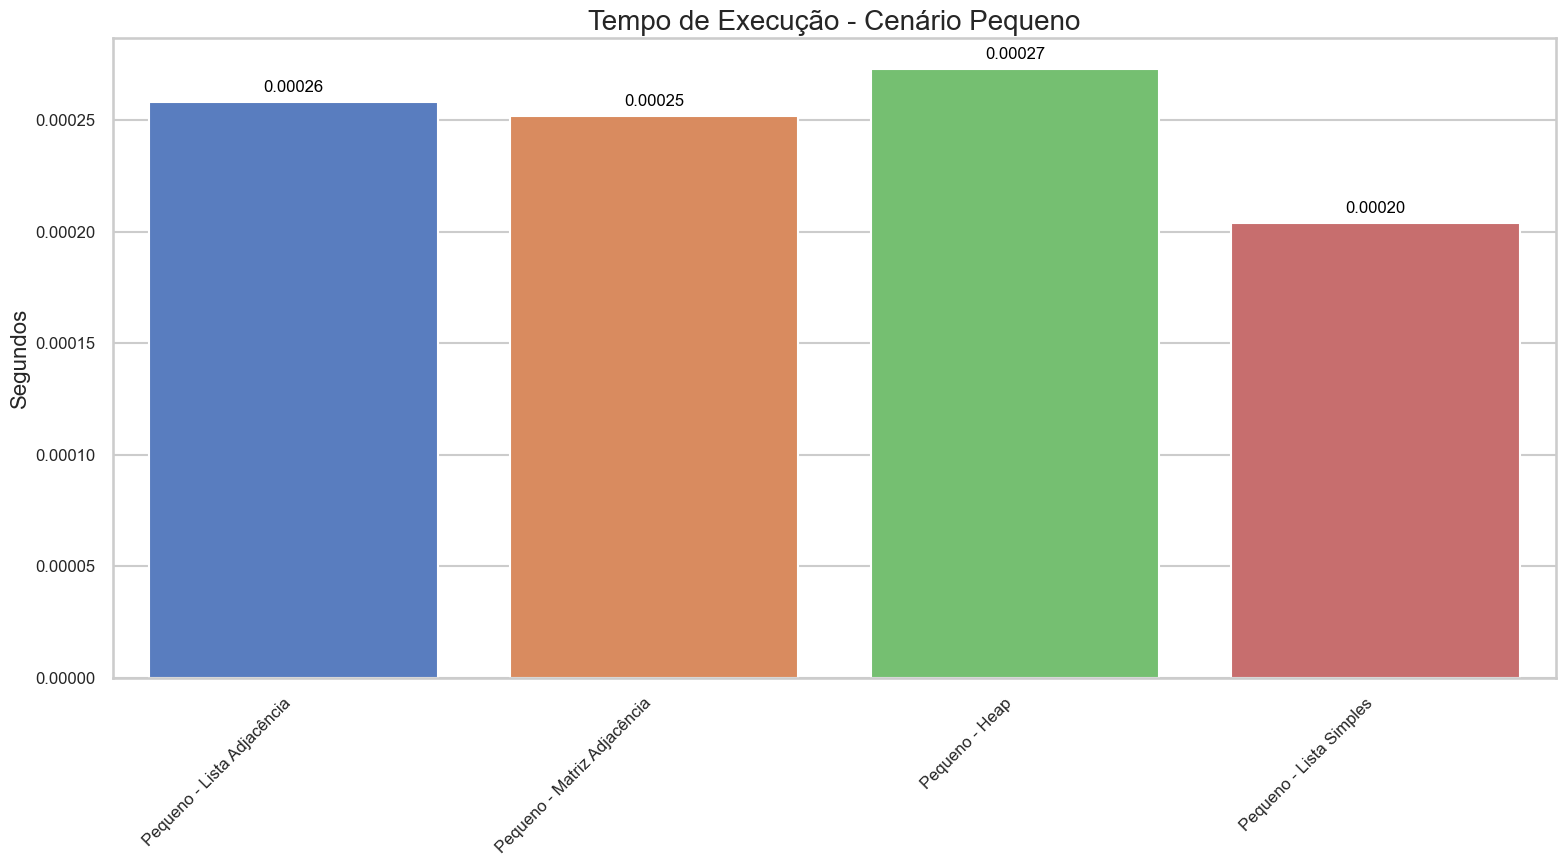

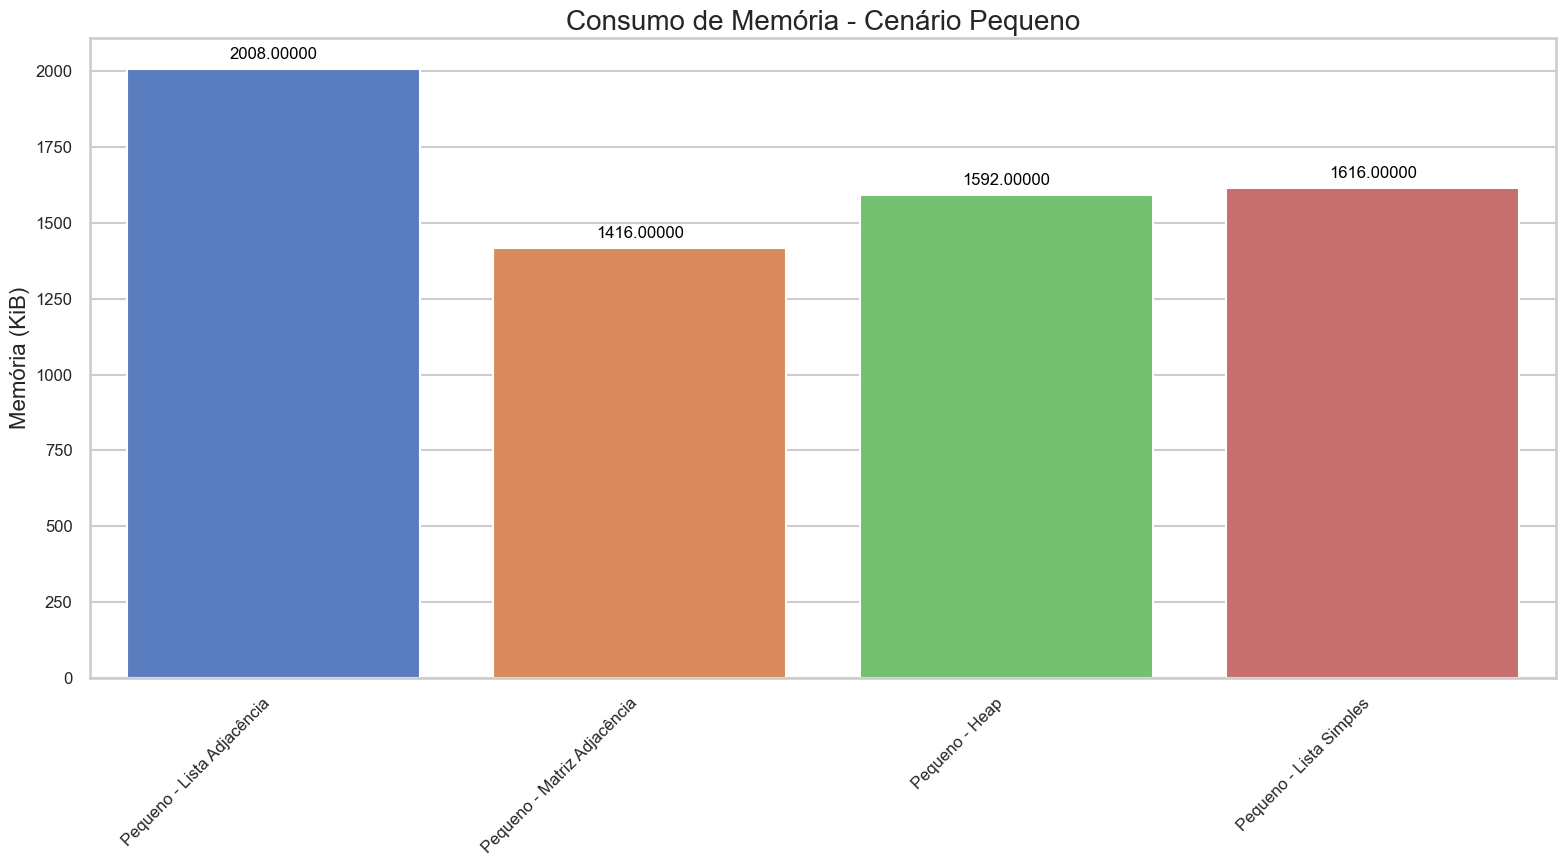

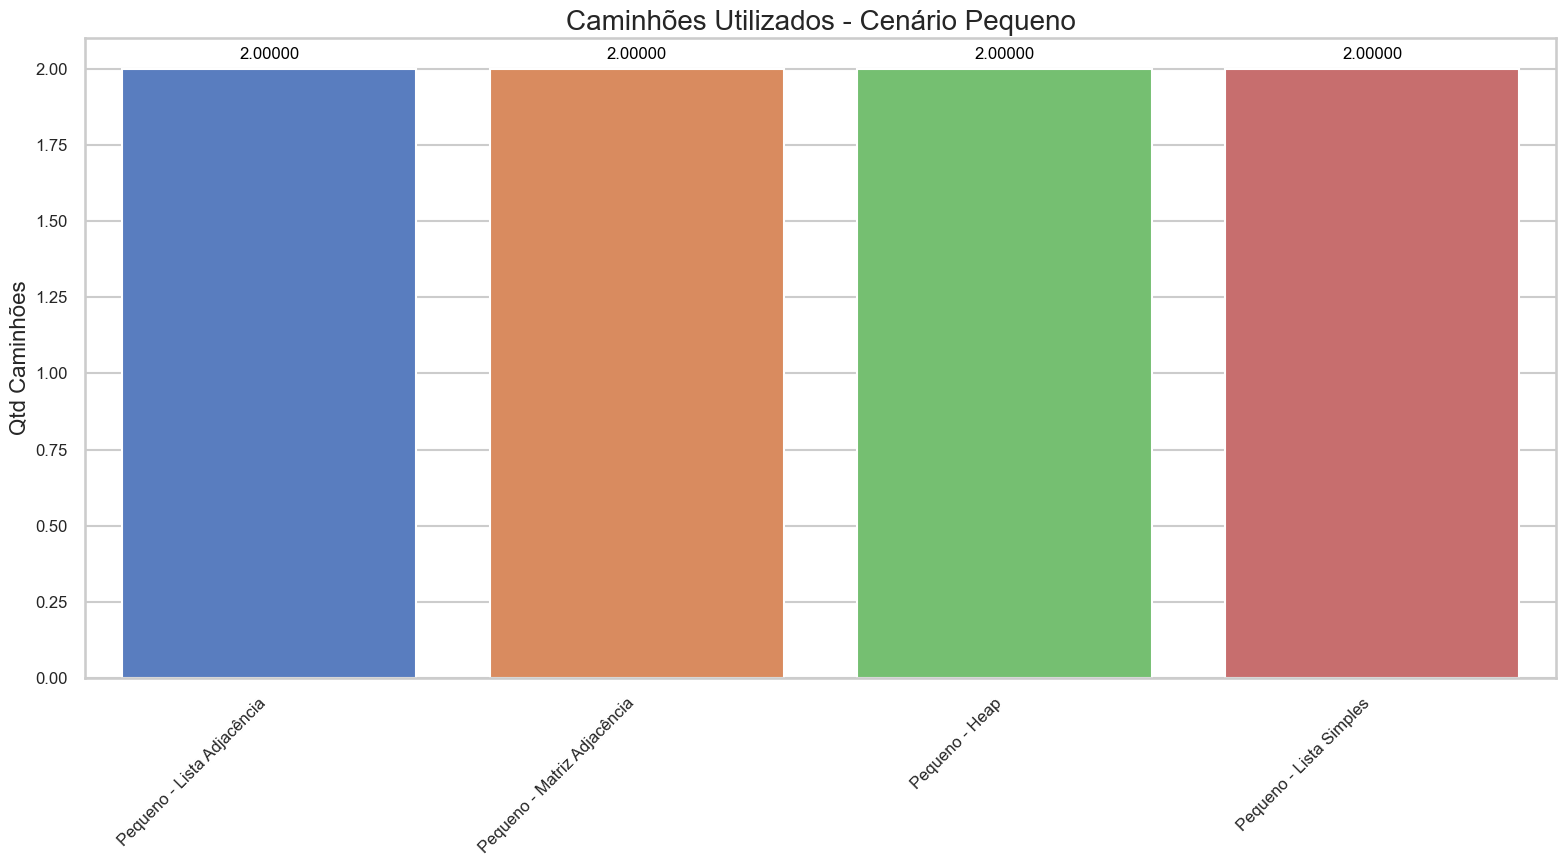

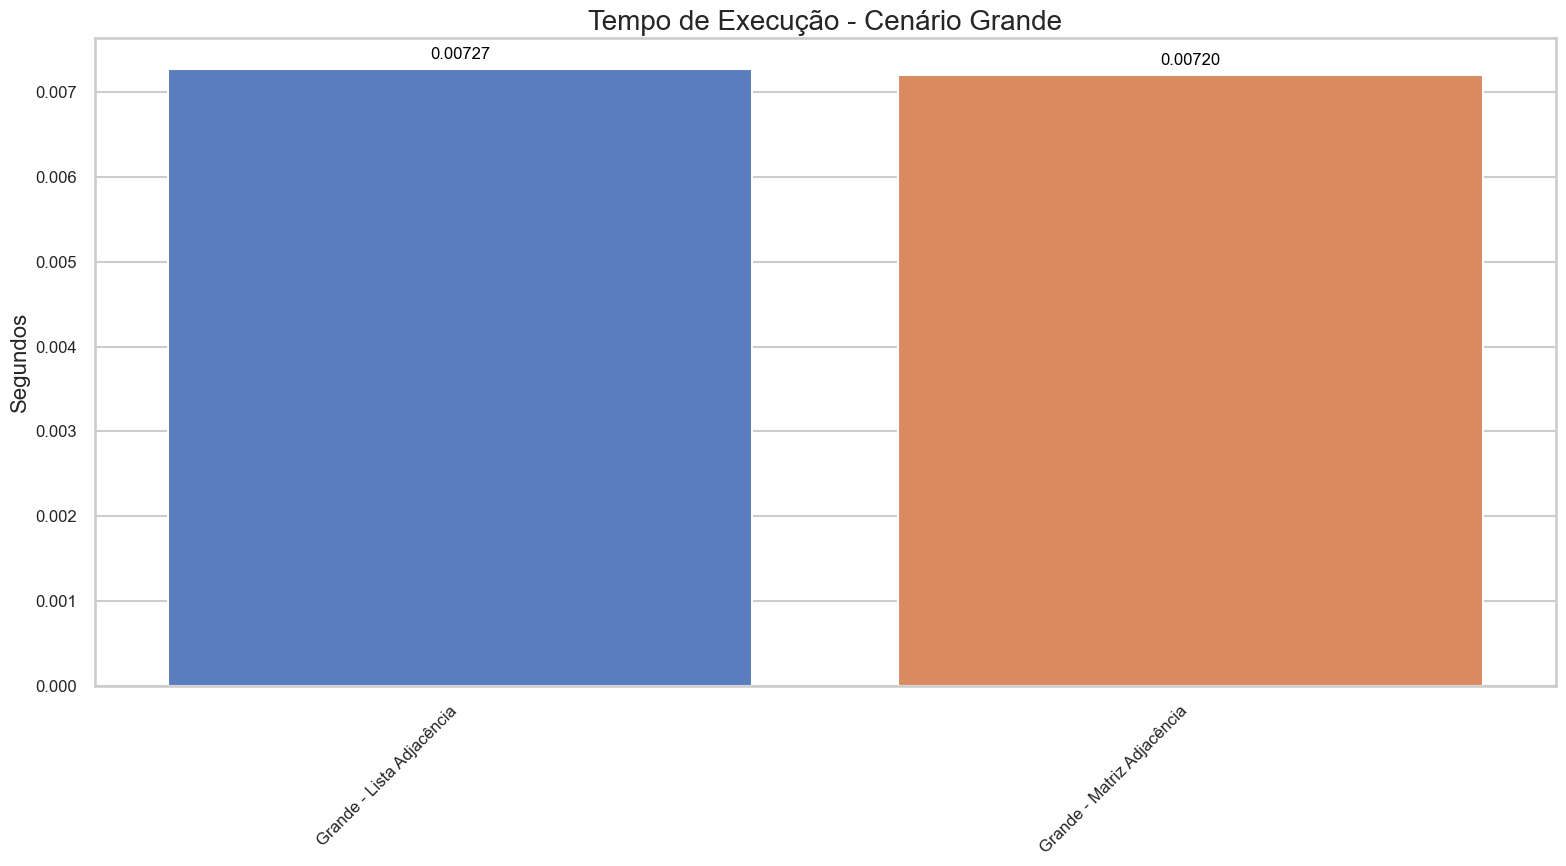

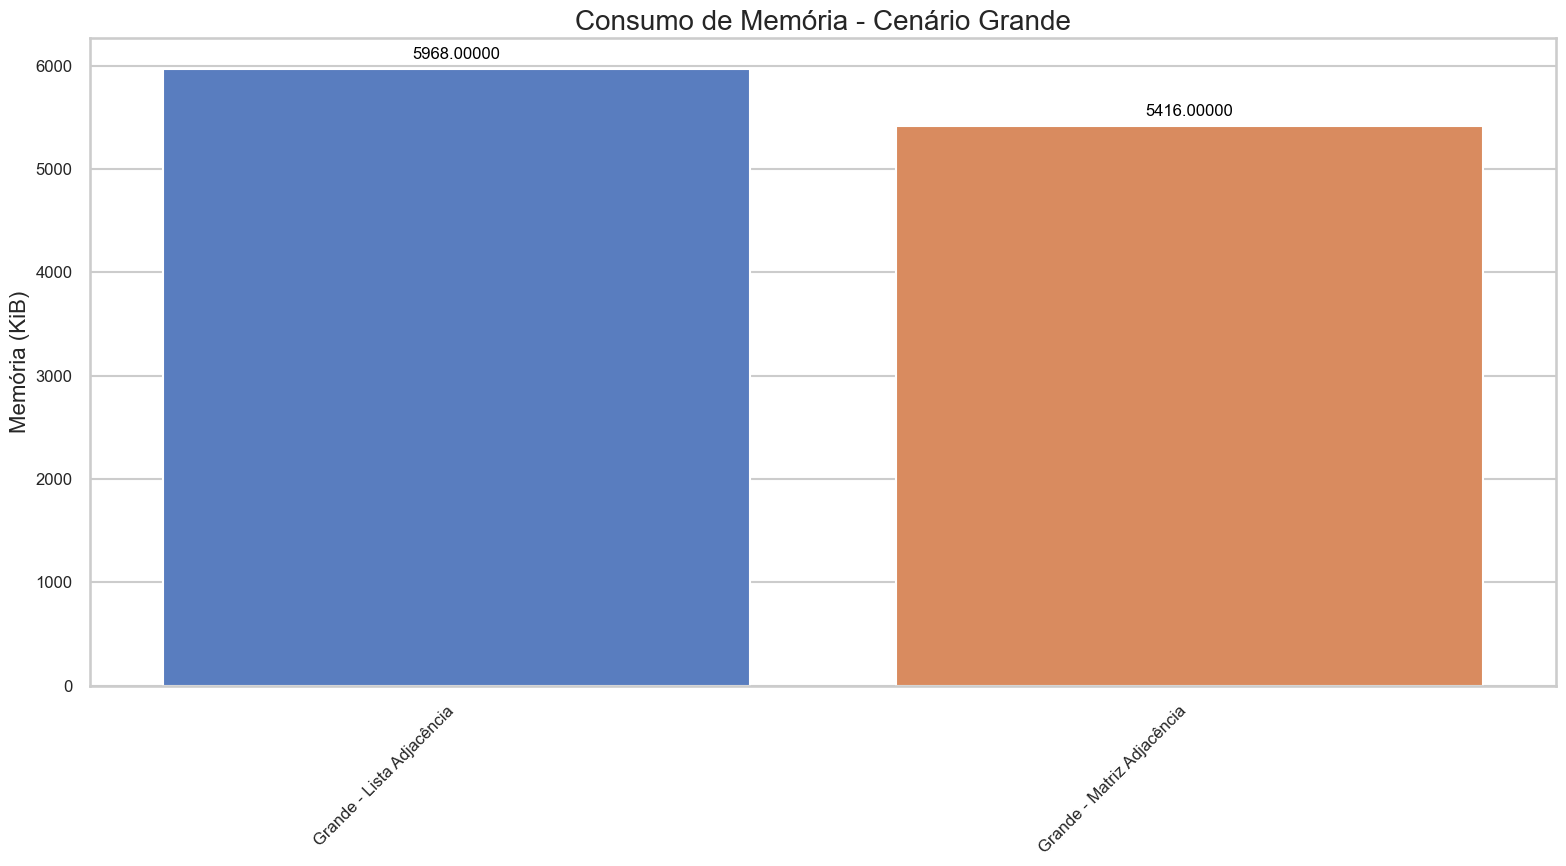

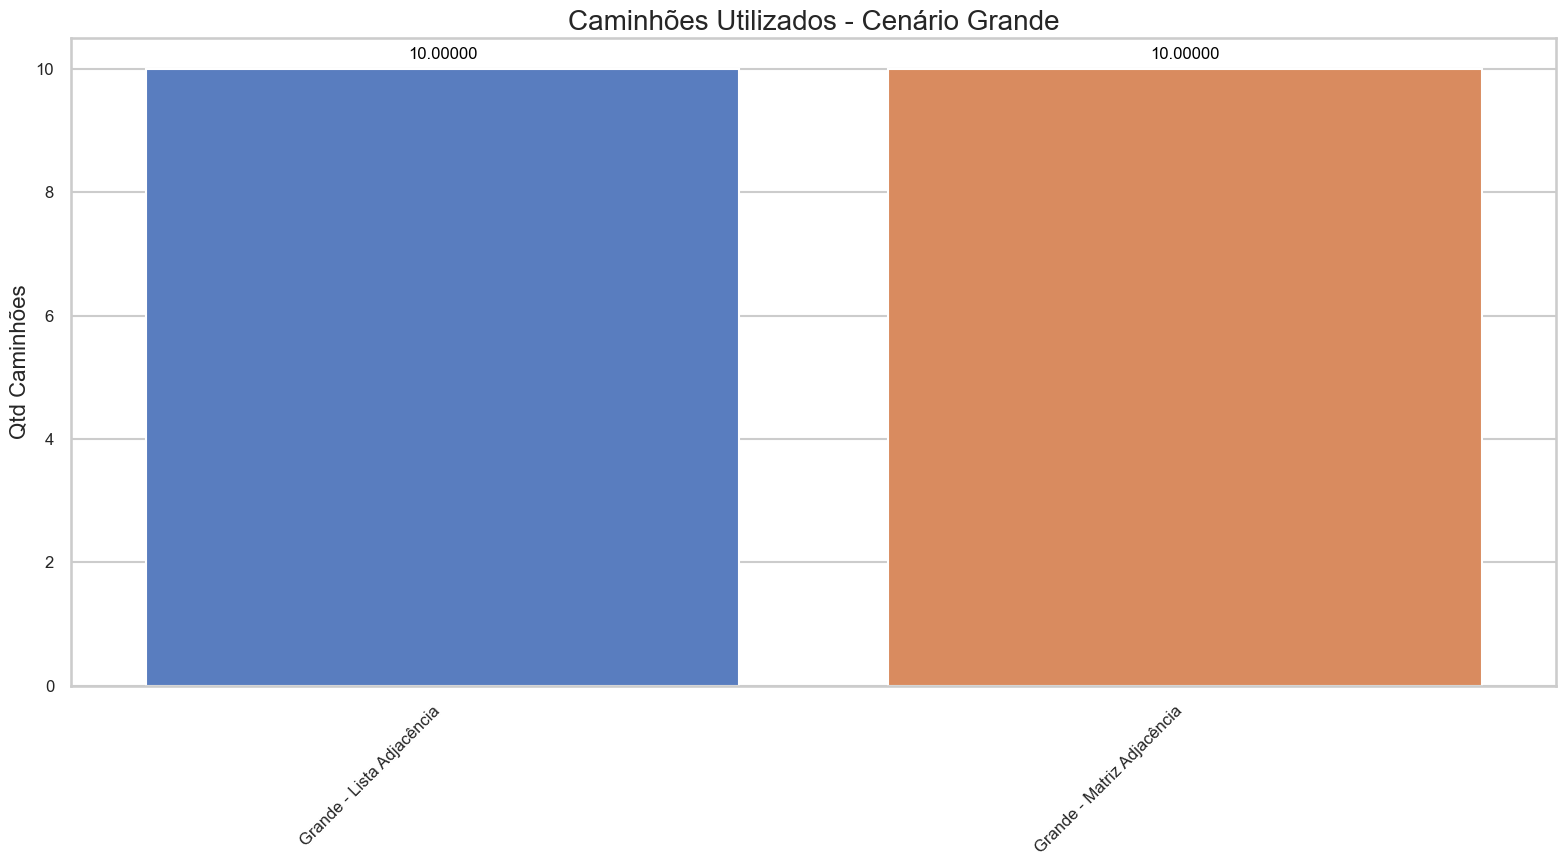

In [9]:

# Criar os gráficos
plots = {
    "tempo_execucao_pequeno": plot_metric(df_pequeno, "tempo_execucao", "Tempo de Execução - Cenário Pequeno", "Segundos"),
    "memoria_pequeno": plot_metric(df_pequeno, "memoria", "Consumo de Memória - Cenário Pequeno", "Memória (KiB)"),
    "caminhoes_pequeno": plot_metric(df_pequeno, "caminhoes_utilizados", "Caminhões Utilizados - Cenário Pequeno", "Qtd Caminhões"),
    "tempo_execucao_grande": plot_metric(df_grande, "tempo_execucao", "Tempo de Execução - Cenário Grande", "Segundos"),
    "memoria_grande": plot_metric(df_grande, "memoria", "Consumo de Memória - Cenário Grande", "Memória (KiB)"),
    "caminhoes_grande": plot_metric(df_grande, "caminhoes_utilizados", "Caminhões Utilizados - Cenário Grande", "Qtd Caminhões")
}

plots["tempo_execucao_pequeno"].show()


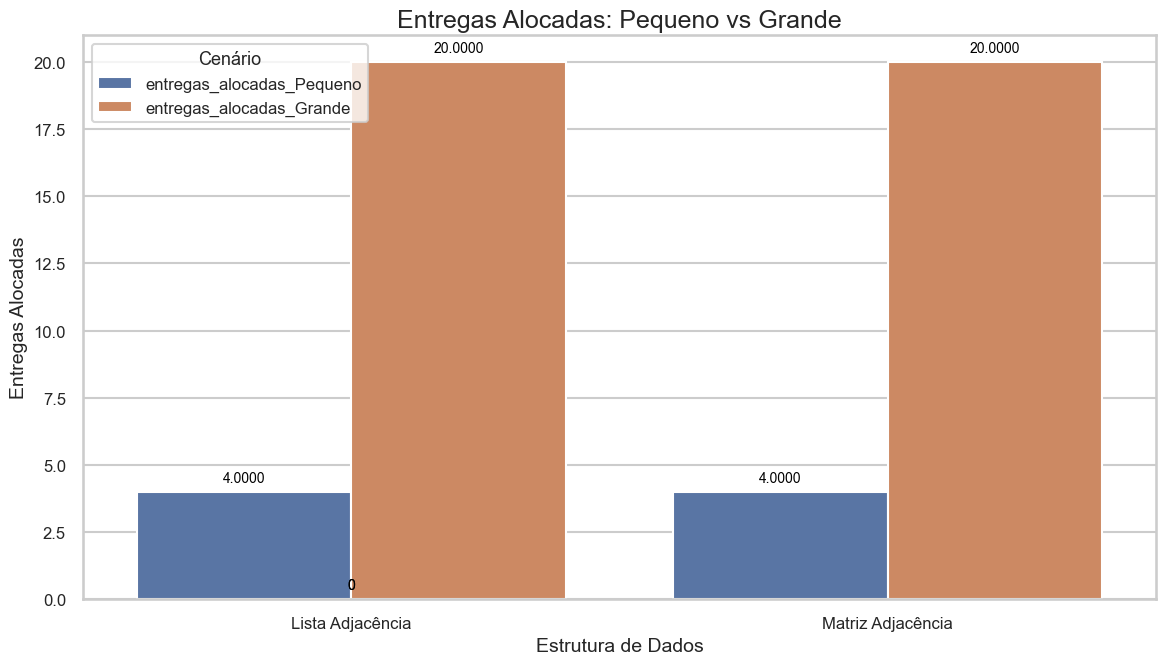

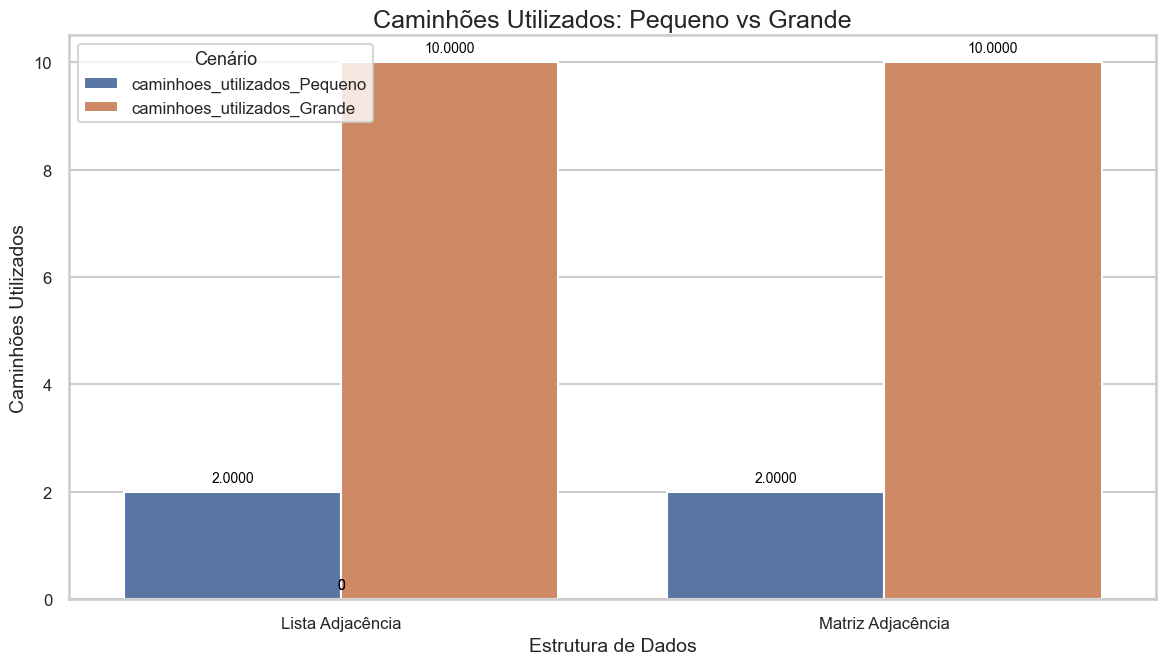

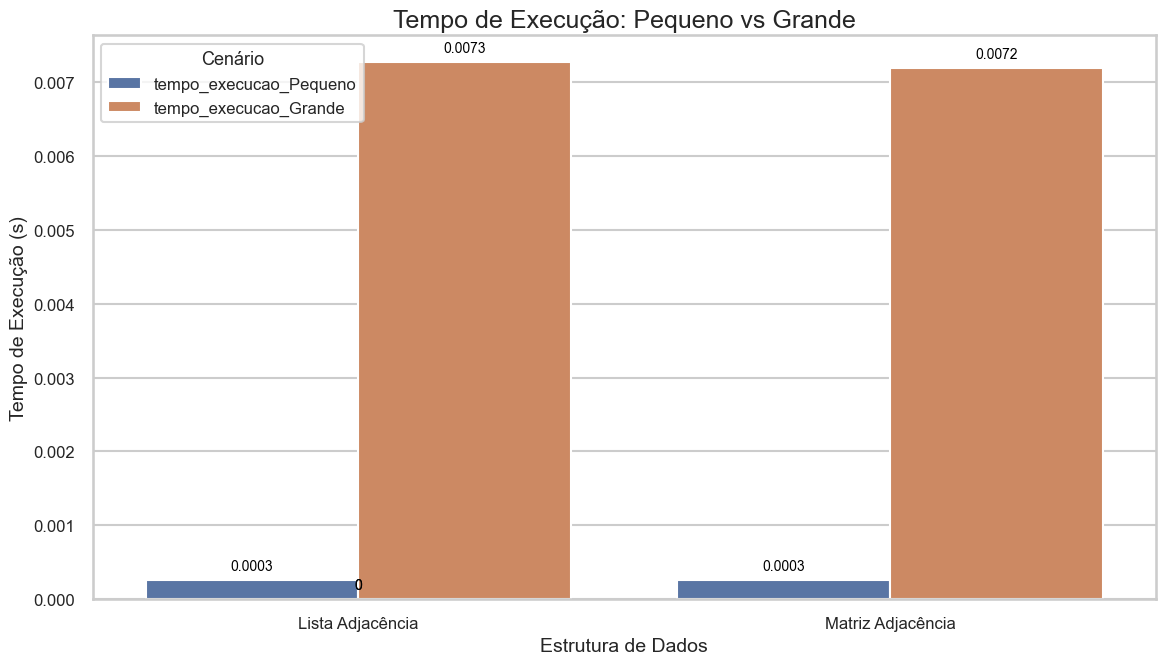

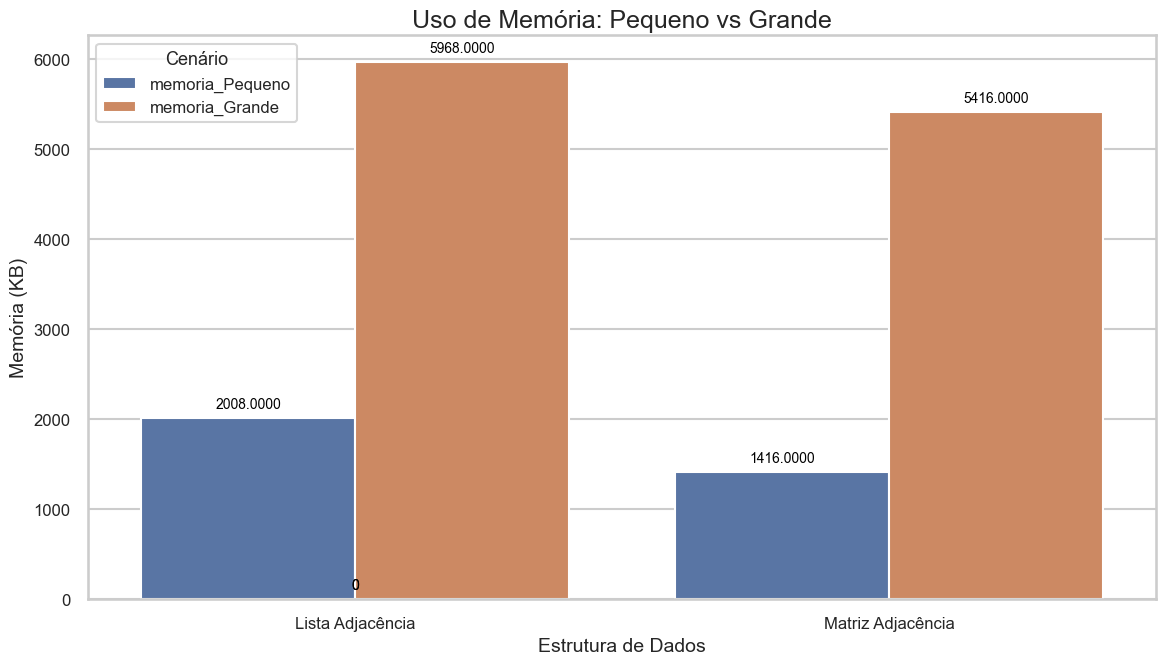

In [10]:
# Separando os cenários pequenos e grandes
df_pequeno = df[df['cenário'].str.contains("Pequeno")].copy()
df_grande = df[df['cenário'].str.contains("Grande")].copy()

# Agregando os dados por tipo de estrutura
df_pequeno['estrutura'] = df_pequeno['cenário'].str.split(' - ').str[1]
df_grande['estrutura'] = df_grande['cenário'].str.split(' - ').str[1]

# Juntando os dois DataFrames para comparação
df_comparativo = pd.merge(
    df_pequeno,
    df_grande,
    on='estrutura',
    suffixes=('_Pequeno', '_Grande')
)

# Função para plotar comparações lado a lado
def plot_comparativo(df, metric, ylabel, title):
    melted = pd.melt(
        df,
        id_vars=['estrutura'],
        value_vars=[f'{metric}_Pequeno', f'{metric}_Grande'],
        var_name='Cenário',
        value_name=metric
    )
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='estrutura', y=metric, hue='Cenário', data=melted, palette="deep")
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel("Estrutura de Dados", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Cenário", title_fontsize=13, fontsize=12)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.4f}' if isinstance(height, float) else f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()

# Comparando cada métrica
plot_comparativo(df_comparativo, "entregas_alocadas", "Entregas Alocadas", "Entregas Alocadas: Pequeno vs Grande")
plot_comparativo(df_comparativo, "caminhoes_utilizados", "Caminhões Utilizados", "Caminhões Utilizados: Pequeno vs Grande")
plot_comparativo(df_comparativo, "tempo_execucao", "Tempo de Execução (s)", "Tempo de Execução: Pequeno vs Grande")
plot_comparativo(df_comparativo, "memoria", "Memória (KB)", "Uso de Memória: Pequeno vs Grande")
